In [47]:
import numpy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [56]:
#Importing the dataset
df_1=pd.read_csv('weather & socio US_counties_COVID19_health_weather_data.csv')

In [57]:
#Getting basic datset information
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790331 entries, 0 to 790330
Columns: 227 entries, date to date_stay_at_home_effective
dtypes: float64(214), int64(1), object(12)
memory usage: 1.3+ GB


In [ ]:
#Identifying Issues
#I'm interested in determining, across US counties, which economic, racial,
#demographic, health, and/or educational variables might correlate with COVID incidence
#COVID deaths will be analyzed instead of COVID cases
#as deaths overall have greater impact on communities

In [58]:
#What is the latest date for which data was collected?
df_1['date']= pd.to_datetime(df_1['date'])
latest_date = df_1['date'].max()
print(latest_date)

2020-12-04 00:00:00


In [59]:
#Is 'cases' a cumulative value?
max_covid_cases = df_1.groupby('fips')['cases'].max()
ustotal_covid_cases = max_covid_cases.sum()
print(ustotal_covid_cases)
#Yes, it would appear to be.

14325528


In [ ]:
total = df_1['cases'].sum()
print (total)
#this is obviously way too large, far exceeding the total US population.
#Therefore, the maximum cases value for each fips most likely equates to the total at latest date
#indicating that case values are cumulative.

In [60]:
#Is 'deaths' a cumulative value?
max_covid_deaths = df_1.groupby('fips')['deaths'].max()
ustotal_covid_deaths = max_covid_deaths.sum()
print(ustotal_covid_deaths)
#Yes: this value is consistent with widely reported numbers of US COVID deaths on or around the latest date
#in the dataset.

277915.0


In [61]:
#The descriptive data about the population of each county was sourced from
#the non-profit County Health Rankings (https://www.countyhealthrankings.org/).
#This data was merged with case and death numbers measured on each separate date
#in the dataset.
#Do the descriptive variables from County Health Rankings fluctuate over the course of the dates captured
#in the dataset, or do they remain constant?
#Testing total population
tot_pop_agg = df_1.groupby('fips').agg({'total_population': ['mean', 'min', 'max']})
tot_pop_agg = tot_pop_agg.dropna()
tot_pop_agg_sum = tot_pop_agg.sum()
print(tot_pop_agg_sum)

total_population  mean    319668390.0
                  min     319668390.0
                  max     319668390.0
dtype: float64


In [62]:
#Testing percent 65 and over
perc_o65_agg = df_1.groupby('fips').agg({'percent_65_and_over': ['mean', 'min', 'max']})
perc_o65_agg = perc_o65_agg.dropna()
perc_o65_agg_sum = perc_o65_agg.sum()
print(perc_o65_agg_sum)

percent_65_and_over  mean    60409.68387
                     min     60409.68387
                     max     60409.68387
dtype: float64


In [63]:
#Testing per capita income
income_agg = df_1.groupby('fips').agg({'per_capita_income': ['mean', 'min', 'max']})
income_agg = income_agg.dropna()
income_agg_sum = income_agg.sum()
print(income_agg_sum)

per_capita_income  mean    7.840680e+07
                   min     7.840680e+07
                   max     7.840680e+07
dtype: float64


In [64]:
#Testing percent uninsured
perc_un_agg = df_1.groupby('fips').agg({'percent_uninsured': ['mean', 'min', 'max']})
perc_un_agg = perc_un_agg.dropna()
perc_un_agg_sum = perc_un_agg.sum()
print(perc_un_agg_sum)

percent_uninsured  mean    35989.943356
                   min     35989.943356
                   max     35989.943356
dtype: float64


In [ ]:
#Surmising that descriptive data about the population in each US county (not COVID cases or deaths)
#remain constant for each county across dates.

In [ ]:
#Data Cleansing
#Cleaning, organizing, and subsetting the data to extract the variables to be explored

In [65]:
#Preparing COVID data to join on fips with second dataset that contains all societal factors 
df_geo_raw = df_1[['fips', 'county', 'state', 'deaths', 'lat', 'lon', 'total_population',
                   'date_stay_at_home_effective',]]
df_geo2 = df_geo_raw.groupby(['fips', 'county', 'state']).max()
df_geo2['perc_deaths'] = df_geo2['deaths'] / df_geo2['total_population']
df_geo2.reset_index(inplace=True)
df_geo2 = df_geo2.dropna(axis=0)
df_geo2

,fips,county,state,deaths,lat,lon,total_population,date_stay_at_home_effective,perc_deaths
0,01001,Autauga,Alabama,42.0,32.534928,-86.642748,55049.0,2020-04-04,0.000763
1,01003,Baldwin,Alabama,138.0,30.727489,-87.722575,199510.0,2020-04-04,0.000692
2,01005,Barbour,Alabama,29.0,31.869589,-85.393213,26614.0,2020-04-04,0.001090
3,01007,Bibb,Alabama,38.0,32.998634,-87.126480,22572.0,2020-04-04,0.001684
4,01009,Blount,Alabama,46.0,33.980878,-86.567383,57704.0,2020-04-04,0.000797
...,...,...,...,...,...,...,...,...,...
3108,55137,Waushara,Wisconsin,10.0,44.113138,-89.242903,24238.0,2020-03-25,0.000413
3109,55139,Winnebago,Wisconsin,127.0,44.068898,-88.644655,169487.0,2020-03-25,0.000749
3110,55141,Wood,Wisconsin,39.0,44.455349,-90.041574,73621.0,2020-03-25,0.000530
3134,KSC,Kansas City,Missouri,302.0,39.130000,-94.550000,1113072.0,2020-04-06,0.000271


In [66]:
#Exporting dataframe as .csv
df_geo2.to_csv(r'/Users/lizmiller/Desktop/df_geo.csv', header=True)

In [55]:
#Importing the composed dataset (see below)
df=pd.read_csv('socio_health_COVID_US.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Columns: 184 entries, fips to percentile_rank_social_vulnerability
dtypes: float64(150), int64(30), object(4)
memory usage: 4.4+ MB


In [ ]:
#Note: this dataset was sourced from Kaggle and in turn composed of 1) data from New York Times COVID
#cases and deaths by date and county, combined with 2) County Health Rankings socioeconomic, demographic,
#and health factors, and 3) weather data. There were two main files: one
#containing societal factors but no COVID data; the second containing societal factors plus COVID case
#and death counts, and weather data, by date. The societal factors (socioeconomic, health, demographic
#were repeated in the second file for each date on which COVID and weather data was taken.
#Weather data is not being used for this analysis.
#The above-referenced data files were incomplete with respect to COVID data for nine states, so supplementation
#was pulled from CDC publicly available data. Finally, the data was consolidated in the following manner:
#socioeconomic, health, and demographic data from the originally-sourced Kaggle data files was merged
#with a complete dataset of COVID death rates and stay-at-home order effective dates, composed mostly from the
#initially sourced data, with CDC COVID data added. Also, a new calculated column representing the number of days
#since 3/17/2020 that the stay-at-home effective date occurred. Negative values represent no complete SAH order
#occurred.

#IMPORTANT: as the latest data collection date of the original data files as 12/4/2020, all COVID
#data in the resulting merged file is as of that date.

In [7]:
print(df.columns.tolist())

['fips', 'state', 'county', 'lat', 'lon', 'percent_deaths', 'date_stay_at_home_effective', 'SAH_#_days_post_3.17.20', 'total_population', 'area_sqmi', 'population_density_per_sqmi', 'num_deaths', 'years_of_potential_life_lost_rate', 'percent_fair_or_poor_health', 'average_number_of_physically_unhealthy_days', 'average_number_of_mentally_unhealthy_days', 'percent_low_birthweight', 'percent_smokers', 'percent_adults_with_obesity', 'food_environment_index', 'percent_physically_inactive', 'percent_with_access_to_exercise_opportunities', 'percent_excessive_drinking', 'num_alcohol_impaired_driving_deaths', 'num_driving_deaths', 'percent_driving_deaths_with_alcohol_involvement', 'num_chlamydia_cases', 'chlamydia_rate', 'teen_birth_rate', 'num_uninsured', 'percent_uninsured', 'num_primary_care_physicians', 'primary_care_physicians_rate', 'num_dentists', 'dentist_rate', 'num_mental_health_providers', 'mental_health_provider_rate', 'preventable_hospitalization_rate', 'percent_with_annual_mammogr

In [ ]:
#Further Data Cleansing & Subsetting
#Organizing data into economic, racial, demographic, health, and educational variables

In [52]:
#Create dataframe with COVID deaths and societal/demographic factors to be investigated, df_s
df_s=df[['county','state','fips','percent_deaths','total_population','SAH_#_days_post_3.17.20',
        'percent_uninsured','percent_overcrowding', 'percent_severe_housing_cost_burden',
        'percent_food_insecure','percent_below_poverty','percent_children_in_poverty', 'per_capita_income',
        'percent_black','percent_american_indian_alaska_native', 'percent_asian',
        'percent_native_hawaiian_other_pacific_islander','percent_hispanic','percent_non_hispanic_white',
        'percent_female', 'segregation_index','percent_minorities','percent_fair_or_poor_health','percent_smokers',
        'percent_adults_with_obesity', 'percent_physically_inactive','percent_with_access_to_exercise_opportunities',
        'percent_disabled', 'percent_unemployed_CDC','percent_no_highschool_diploma',
        'percent_limited_english_abilities', 'percent_not_proficient_in_english','area_sqmi',
        'population_density_per_sqmi', 'percent_65_and_over','percent_age_17_and_younger']]
df_s

,county,state,fips,percent_deaths,total_population,SAH_#_days_post_3.17.20,percent_uninsured,percent_overcrowding,percent_severe_housing_cost_burden,percent_food_insecure,...,percent_with_access_to_exercise_opportunities,percent_disabled,percent_unemployed_CDC,percent_no_highschool_diploma,percent_limited_english_abilities,percent_not_proficient_in_english,area_sqmi,population_density_per_sqmi,percent_65_and_over,percent_age_17_and_younger
0,Autauga,Alabama,1001,0.076296,55049,18.0,8.721686,1.200000,13.403481,13.200000,...,69.130124,18.400000,5.600000,12.400000,0.800000,0.820225,594.446120,92.605533,15.562670,25.200000
1,Baldwin,Alabama,1003,0.069170,199510,18.0,11.333404,1.300000,11.725808,11.600000,...,73.713549,13.900000,6.300000,10.000000,0.800000,0.543517,1589.807425,125.493187,20.443350,22.200000
2,Barbour,Alabama,1005,0.108965,26614,18.0,12.242792,1.700000,14.059546,22.000000,...,53.166770,21.500000,12.800000,26.200000,1.500000,1.631683,884.875776,30.076538,19.420441,21.500000
3,Bibb,Alabama,1007,0.168350,22572,18.0,10.206253,0.300000,9.886874,14.300000,...,16.251364,14.800000,7.100000,19.300000,0.400000,0.268210,622.582355,36.255444,16.473214,21.100000
4,Blount,Alabama,1009,0.079717,57704,18.0,13.360759,1.900000,8.462257,10.700000,...,15.634486,14.900000,6.000000,20.000000,1.900000,1.724520,644.806508,89.490412,18.236515,23.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,Uinta,Wyoming,56041,0.000000,20893,60.0,13.664737,3.400000,7.707668,12.800000,...,84.018373,14.600000,6.400000,10.400000,1.300000,0.696080,2081.827988,10.035892,14.079511,29.600000
3140,Washakie,Wyoming,56043,0.079961,8351,60.0,16.730280,2.100000,6.816780,11.200000,...,83.182937,19.000000,7.400000,12.600000,0.700000,0.324886,2238.550443,3.730539,21.686747,24.800000
3141,Weston,Wyoming,56045,0.000000,7175,60.0,13.370998,1.100000,11.050291,13.100000,...,63.027192,14.000000,3.600000,8.600000,1.100000,0.862069,2398.090296,2.991964,20.510980,21.100000
3142,Kansas City,Missouri,KSC,0.027132,1113072,20.0,10.899653,1.529774,11.977038,14.170384,...,88.882359,12.818194,6.115614,8.877533,1.435414,1.511567,2118.989867,525.284248,14.909420,24.350060


In [ ]:
#Analysis

<AxesSubplot:>

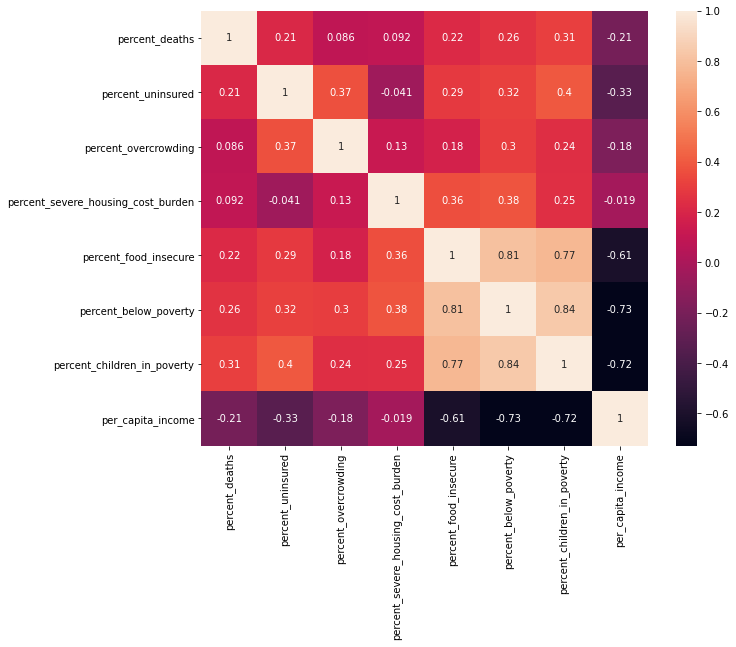

In [13]:
#Correlation analysis between COVID deaths and each of the economic variables
df_si = df_s[['percent_deaths','percent_uninsured','percent_overcrowding',
              'percent_severe_housing_cost_burden','percent_food_insecure','percent_below_poverty',
              'percent_children_in_poverty', 'per_capita_income']]
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_si.corr(), annot=True)

<AxesSubplot:>

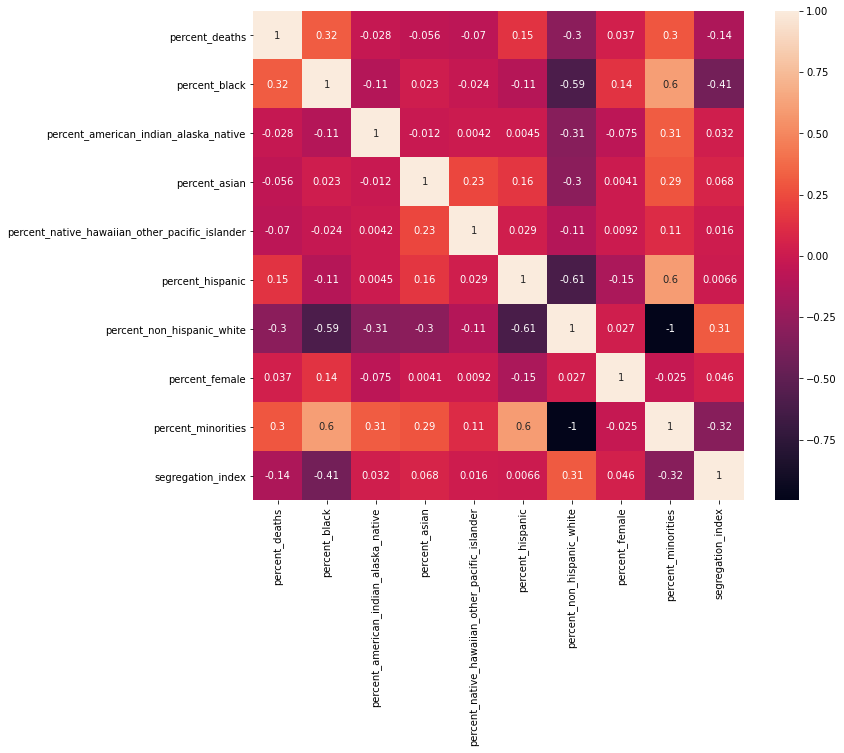

In [105]:
#Correlation analysis between COVID deaths and each of the race variables
df_sr = df_s[['percent_deaths','percent_black','percent_american_indian_alaska_native', 'percent_asian',
        'percent_native_hawaiian_other_pacific_islander','percent_hispanic','percent_non_hispanic_white',
        'percent_female', 'percent_minorities', 'segregation_index',]]
fig = plt.figure(figsize=(11,9))
sns.heatmap(df_sr.corr(), annot=True)

<AxesSubplot:>

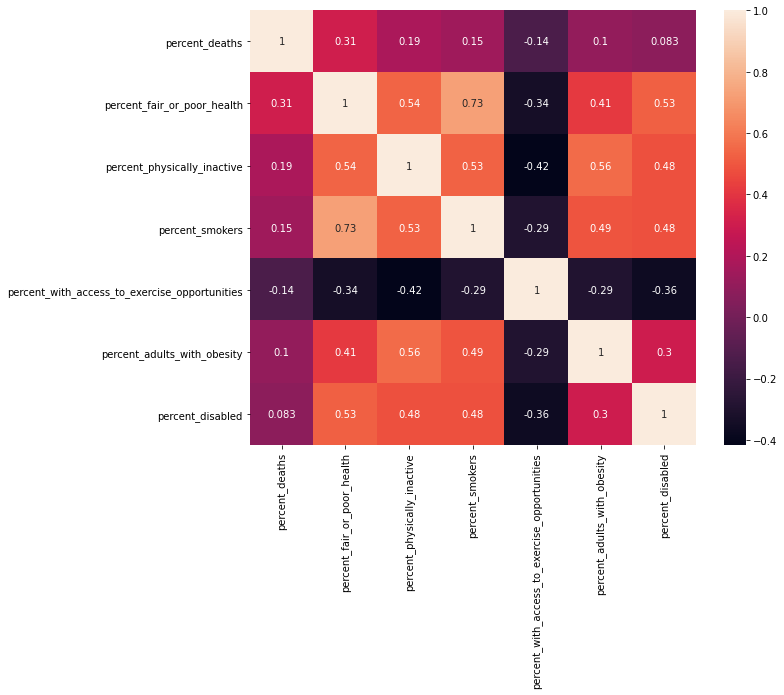

In [6]:
#Correlation between each of the existing health status variables and COVID death rate:
df_sh=df_s[['percent_deaths','percent_fair_or_poor_health', 'percent_physically_inactive',
            'percent_smokers','percent_with_access_to_exercise_opportunities',
             'percent_adults_with_obesity','percent_disabled',]]
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_sh.corr(), annot=True)

<AxesSubplot:>

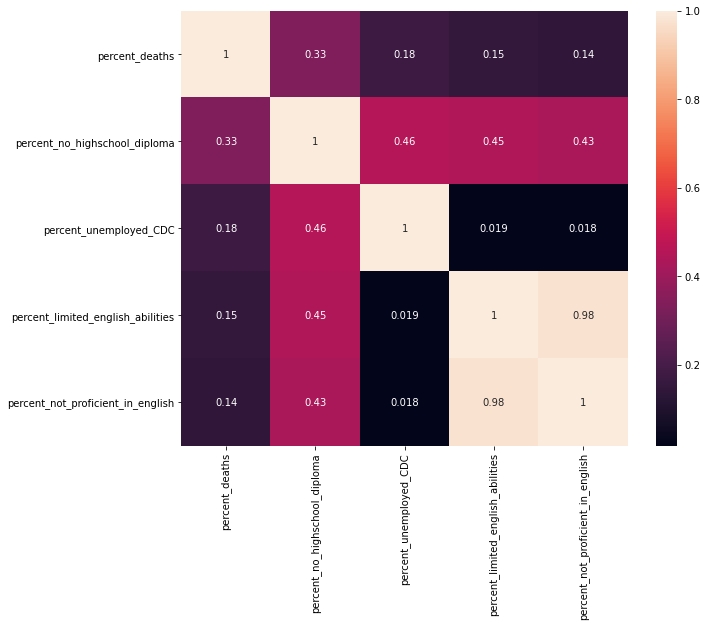

In [4]:
#Correlation between each of the education / employment factors and COVID death rate:
df_se = df_s[['percent_deaths','percent_no_highschool_diploma','percent_unemployed_CDC',
                 'percent_limited_english_abilities', 'percent_not_proficient_in_english', ]]
fig = plt.figure(figsize=(10,8))
sns.heatmap(df_se.corr(), annot=True)

<AxesSubplot:>

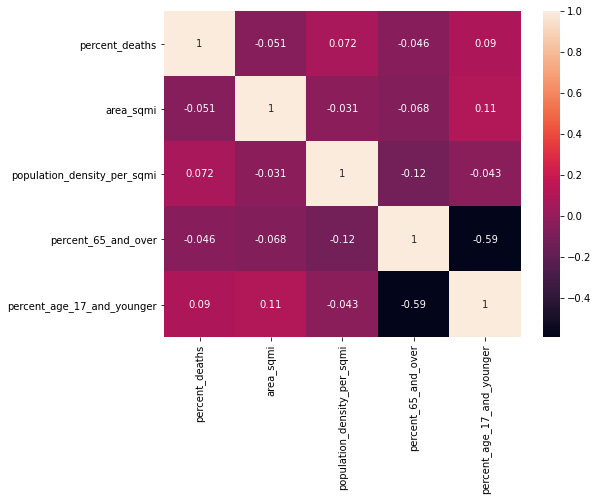

In [106]:
#Correlation between each of the population factors and COVID death rate:
df_sp = df_s[['percent_deaths', 'area_sqmi', 'population_density_per_sqmi', 'percent_65_and_over',
             'percent_age_17_and_younger']]
fig = plt.figure(figsize=(8,6))
sns.heatmap(df_sp.corr(), annot=True)

In [ ]:
#Insights
#Plotting variables most correlated with COVID deaths and finding line of best fit
#Using distribution visualizations and dataframe calculations to assess impact on vulnerable populations

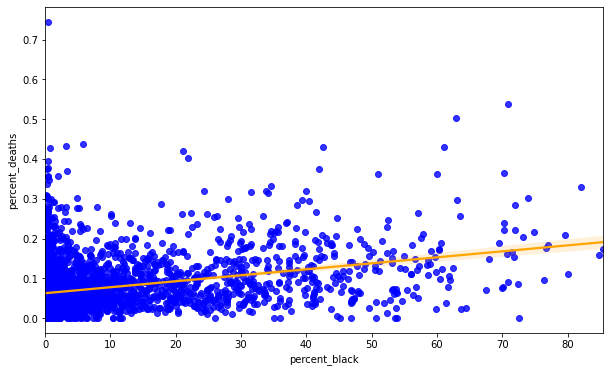

In [30]:
#Plotting percent Black as the independent variable and percent deaths from COVID as the dependent variable,
#adding a line of best fit
fig = plt.figure(figsize=(10,6))
ax = sns.regplot(x = 'percent_black', y = 'percent_deaths', data = df_sr, scatter_kws={'color': 'blue'},
                line_kws = {'color': 'orange'})

array([[<AxesSubplot:title={'center':'percent_black'}>]], dtype=object)

<Figure size 432x720 with 0 Axes>

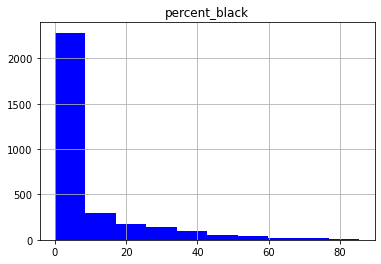

In [16]:
fig = plt.figure(figsize=(6,10))
df_s.hist(column='percent_black', color = 'blue')

In [ ]:
#The majority of counties are less than 10% black, showing how over generations, our governments,
#structures and institutional practices have pushed Black Americans into purposefully segregated
#environments, the better to ensure resources were kept from them.

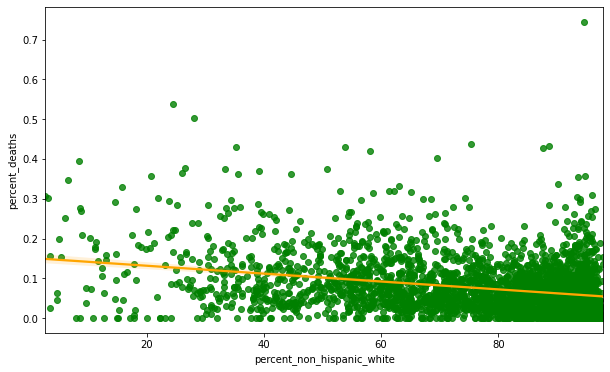

In [31]:
#Plotting percent non-Hispanic white as the independent variable and percent deaths from COVID 
#as the dependent variable,
#adding a line of best fit
fig = plt.figure(figsize=(10,6))
ax = sns.regplot(x = 'percent_non_hispanic_white', y = 'percent_deaths', data = df_sr,
                scatter_kws = {'color': 'green'}, line_kws={'color': 'orange'})

array([[<AxesSubplot:title={'center':'percent_non_hispanic_white'}>]],
      dtype=object)

<Figure size 432x720 with 0 Axes>

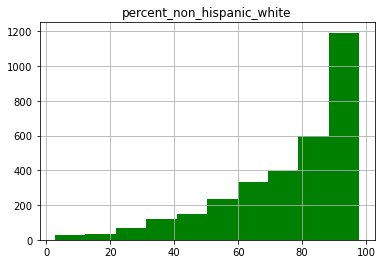

In [11]:
fig = plt.figure(figsize=(6,10))
df_s.hist(column='percent_non_hispanic_white', color = 'green')

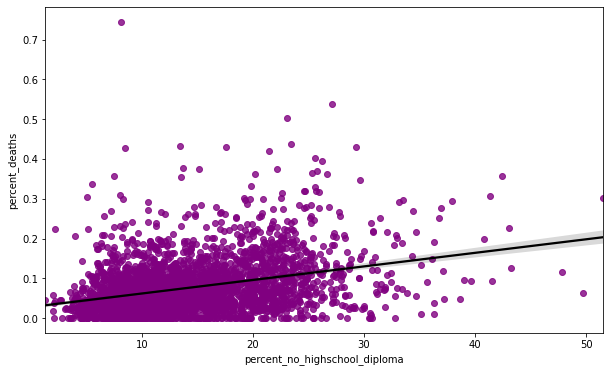

In [17]:
#Plotting no high-school diploma as the independent variable and percent deaths from COVID 
#as the dependent variable,
#adding a line of best fit
fig = plt.figure(figsize=(10,6))
ax = sns.regplot(x='percent_no_highschool_diploma', y='percent_deaths', data = df_se,
                scatter_kws = {'color': 'purple'}, line_kws={'color': 'black'})

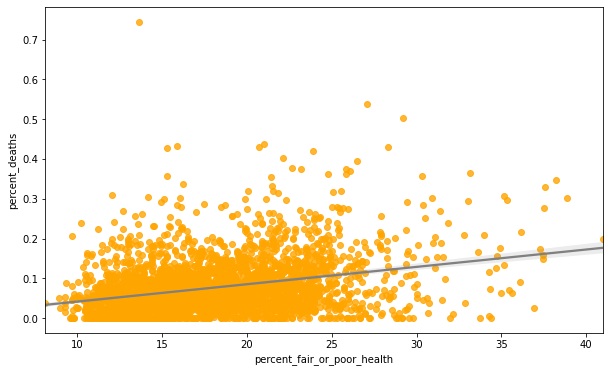

In [32]:
#Plotting no children in poverty as the independent variable and percent deaths from COVID 
#as the dependent variable,
#adding a line of best fit
fig = plt.figure(figsize=(10,6))
ax = sns.regplot(x='percent_fair_or_poor_health', y = 'percent_deaths', data = df_sh,
                scatter_kws = {'color': 'orange'}, line_kws={'color': 'gray'})

array([[<AxesSubplot:title={'center':'percent_fair_or_poor_health'}>]],
      dtype=object)

<Figure size 432x720 with 0 Axes>

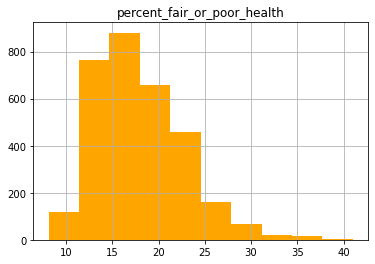

In [19]:
fig = plt.figure(figsize=(6,10))
df_s.hist(column='percent_fair_or_poor_health', color = 'orange')

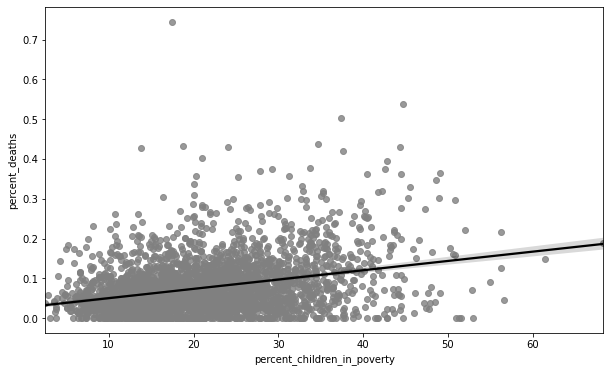

In [33]:
#Plotting no percent_children_in_poverty as the independent variable and percent deaths from COVID 
#as the dependent variable,
#adding a line of best fit
fig = plt.figure(figsize=(10,6))
ax = sns.regplot(x='percent_children_in_poverty', y = 'percent_deaths', data = df_si,
                scatter_kws = {'color': 'gray'}, line_kws={'color': 'black'})

array([[<AxesSubplot:title={'center':'percent_children_in_poverty'}>]],
      dtype=object)

<Figure size 432x720 with 0 Axes>

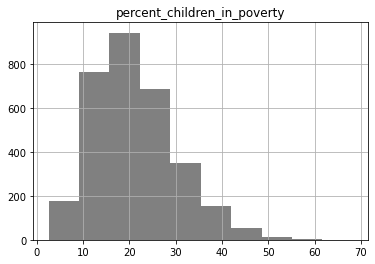

In [20]:
fig = plt.figure(figsize=(6,10))
df_s.hist(column='percent_children_in_poverty', color = 'gray')

In [42]:
df_sah = df_s[['percent_deaths', 'SAH_#_days_post_3.17.20']]
df_sah1 = df_sah[(df_sah['SAH_#_days_post_3.17.20'] > 0)]

<AxesSubplot:>

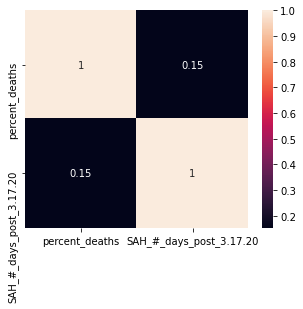

In [44]:
fig = plt.figure(figsize=(5,4))
sns.heatmap(df_sah1.corr(), annot=True)

<AxesSubplot:>

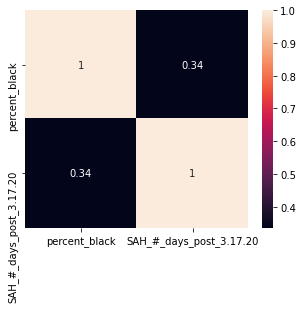

In [47]:
#Exploring possible correlation with %Black by county and later SAH effective date
df_sahB = df_s[['percent_black', 'SAH_#_days_post_3.17.20']]
df_sahB1 = df_sahB[(df_sahB['SAH_#_days_post_3.17.20'] > 0)]
fig = plt.figure(figsize=(5,4))
sns.heatmap(df_sahB1.corr(), annot=True)

In [65]:
#Exploring the relationship between later SAH order effective and percent Black by county
df_sahB1_g = df_sahB1.groupby(['SAH_#_days_post_3.17.20']).mean()
df_sahB1_g.reset_index(inplace=True)
df_sahB1_g

,SAH_#_days_post_3.17.20,percent_black
0,2.0,3.035678
1,4.0,6.255869
2,5.0,5.011127
3,6.0,10.835851
4,7.0,3.134092
5,8.0,1.272380
6,9.0,2.993553
7,10.0,1.781459
8,11.0,1.019091
9,13.0,14.274628


<AxesSubplot:>

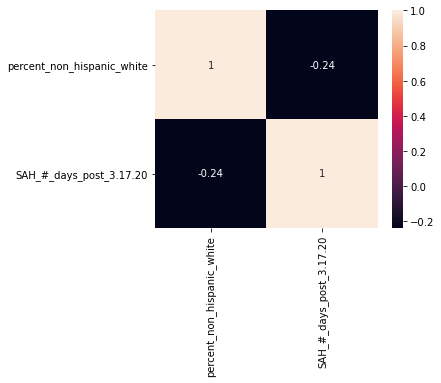

In [58]:
#Exploring possible correlation with %white by county and later SAH effective date
df_sahw = df_s[['percent_non_hispanic_white', 'SAH_#_days_post_3.17.20']]
df_sahw1 = df_sahw[(df_sahw['SAH_#_days_post_3.17.20'] > 0)]
fig = plt.figure(figsize=(5,4))
sns.heatmap(df_sahw1.corr(), annot=True)

In [71]:
#Exploring the relationship between later SAH order effective and percent white by county
df_sahw1_g = df_sahw1.groupby(['SAH_#_days_post_3.17.20']).mean()
df_sahw1_g.reset_index(inplace=True)
df_sahw1_g

,SAH_#_days_post_3.17.20,percent_non_hispanic_white
0,2.0,53.464191
1,4.0,82.318483
2,5.0,83.876112
3,6.0,77.582929
4,7.0,83.859755
5,8.0,84.147648
6,9.0,85.373625
7,10.0,88.253433
8,11.0,73.748564
9,13.0,73.472021


<AxesSubplot:>

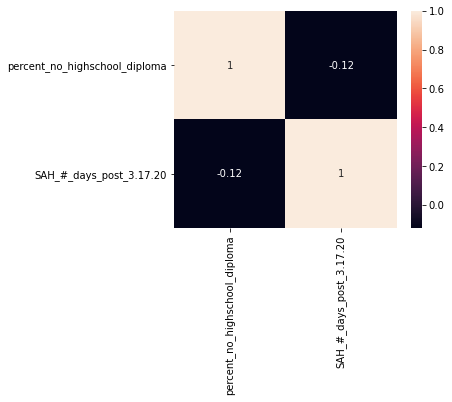

In [50]:
#Exploring possible correlation with %no highschool diploma by county and later SAH effective date
df_sahhs = df_s[['percent_no_highschool_diploma', 'SAH_#_days_post_3.17.20']]
df_sahhs1 = df_sahhs[(df_sahhs['SAH_#_days_post_3.17.20'] > 0)]
fig = plt.figure(figsize=(5,4))
sns.heatmap(df_sahhs1.corr(), annot=True)

In [88]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable percent_black
df_B50 = df_s[df_s.percent_black > df_s.percent_black.quantile(.5)]
df_B50_m = df_B50['percent_deaths'].mean()
print(df_B50_m)

0.09021414016273126


In [89]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable percent_non_hispanic_white
df_w50 = df_s[df_s.percent_non_hispanic_white > df_s.percent_non_hispanic_white.quantile(.5)]
df_w50_m = df_w50['percent_deaths'].mean()
print(df_w50_m)

0.06189462796437659


In [107]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable no_highschool_diploma
df_nh50 = df_s[df_s.percent_no_highschool_diploma > df_s.percent_no_highschool_diploma.quantile(.5)]
df_nh50_m = df_nh50['percent_deaths'].mean()
print(df_nh50_m)

0.09333568630739783


In [116]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable percent_minorities
df_m50 = df_s[df_s.percent_minorities > df_s.percent_minorities.quantile(.5)]
df_m50_m = df_m50['percent_deaths'].mean()
print(df_m50_m)

0.09034963168158555


In [117]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable percent_chidren_in_poverty
df_c50 = df_s[df_s.percent_children_in_poverty > df_s.percent_children_in_poverty.quantile(.5)]
df_c50_m = df_c50['percent_deaths'].mean()
print(df_c50_m)

0.091587099751773


In [118]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable percent_below_poverty
df_b50 = df_s[df_s.percent_below_poverty > df_s.percent_below_poverty.quantile(.5)]
df_b50_m = df_b50['percent_deaths'].mean()
print(df_b50_m)

0.08965904420127789


In [119]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable percent_food_insecure
df_f50 = df_s[df_s.percent_food_insecure > df_s.percent_food_insecure.quantile(.5)]
df_f50_m = df_f50['percent_deaths'].mean()
print(df_f50_m)

0.08449698852960297


In [121]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable percent_uninsured
df_u50 = df_s[df_s.percent_uninsured > df_s.percent_uninsured.quantile(.5)]
df_u50_m = df_u50['percent_deaths'].mean()
print(df_u50_m)

0.08747188127151051


In [122]:
#Filtering dataset of race variables and percent COVID deaths for rows in the top half
# of the variable per_capita_income
df_i50 = df_s[df_s.per_capita_income > df_s.per_capita_income.quantile(.5)]
df_i50_m = df_i50['percent_deaths'].mean()
print(df_i50_m)

0.062335885124600615


In [53]:
#Assessing actual numbers of the population likely to be most affected
#by COVID and other threats to health, life, well-being and productivity
mean_perc_nohsd = df_s['percent_no_highschool_diploma'].mean()
mean_perc_nohsd = str(mean_perc_nohsd)
print('Mean percent no highschool diploma is ' + mean_perc_nohsd)
mean_perc_black = df_s['percent_black'].mean()
mean_perc_black = str(mean_perc_black)
print('Mean percent Black American is ' + mean_perc_black)
mean_perc_fphealth = df_s['percent_fair_or_poor_health'].mean()
mean_perc_fphealth = str(mean_perc_fphealth)
print('Mean percent in fair or poor health is ' + mean_perc_fphealth)
mean_perc_cpov = df_s['percent_children_in_poverty'].mean()
mean_perc_cpov = str(mean_perc_cpov)
print('Mean percent children in poverty is ' + mean_perc_cpov)
total_pop_all_counties = df_s['total_population'].sum()
total_pop_all_counties = str(total_pop_all_counties)
print('The total population across all counties, i.e. in all of the US, is ' + total_pop_all_counties)
print('The total child population is approximately 74200000')
total_adult_pop = (328133195 - 74200000)
total_adult_pop = str(total_adult_pop)
print('The total adult population is approximately ' + total_adult_pop)

Mean percent no highschool diploma is 14.188400217220062
Mean percent Black American is 8.998458845647562
Mean percent in fair or poor health is 17.935375346773252
Mean percent children in poverty is 21.105737335497942
The total population across all counties, i.e. in all of the US, is 328133195
The total child population is approximately 74200000
The total adult population is approximately 253933195


In [54]:
#Calculating total number of people across all counties potentially more vulnerable to disease
#Total population for no hs diploma excludes children
#Total population of children in poverty excludes adults
#see https://bit.ly/3cNNVuE
data = {'Measure': ['nohsd', 'black', 'fphealth', 'cpov'], 
        'Mean_perc_all_counties':[14.188400217220062, 8.998458845647562, 17.935375346773252,
                                 21.105737335497942], 'Total_pop_all_counties':[253933195, 328133195,
                                                                               328133195, 74200000]}
df_imp = pd.DataFrame(data)
df_imp['Mean_perc_all_counties'] = pd.to_numeric(df_imp['Mean_perc_all_counties'], downcast="float")
df_imp['Total_pop_all_counties'] = pd.to_numeric(df_imp['Total_pop_all_counties'], downcast="float")
df_imp['total_affected'] = df_imp['Mean_perc_all_counties'] * df_imp['Total_pop_all_counties'] / 100
print(df_imp)

    Measure  Mean_perc_all_counties  Total_pop_all_counties  total_affected
0     nohsd               14.188400             253933200.0      36029060.0
1     black                8.998459             328133184.0      29526930.0
2  fphealth               17.935375             328133184.0      58851916.0
3      cpov               21.105738              74200000.0      15660457.0
